In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import requests
import pandas as pd

In [ ]:
ticker = "TSLA"
api_key = "ec2d6f3b0cc9395fbce02f1316669229"
years = 10

In [ ]:
url = (f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?limit={years}&apikey={api_key}")
r = requests.get(url)
income_statement = r.json()

print(income_statement)

In [ ]:
df_income_statement = pd.DataFrame(income_statement)
print(df_income_statement)


In [ ]:
df_income_statement.head()

In [110]:
df_income_statement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     5 non-null      object 
 1   symbol                                   5 non-null      object 
 2   reportedCurrency                         5 non-null      object 
 3   cik                                      5 non-null      object 
 4   fillingDate                              5 non-null      object 
 5   acceptedDate                             5 non-null      object 
 6   calendarYear                             5 non-null      object 
 7   period                                   5 non-null      object 
 8   revenue                                  5 non-null      int64  
 9   costOfRevenue                            5 non-null      int64  
 10  grossProfit                              5 non-null   

In [111]:
#Gross Profit Margin - it reveals the ability of an organization to earn a reasonable return on its offerings
def format_float(gpm):
    return f'{gpm:,.2f}'
gpm = df_income_statement[['grossProfit', 'revenue']].applymap(format_float)
print(gpm)

gross_profit_margin = df_income_statement['grossProfit'][0] / df_income_statement['revenue'][0]
print(f'Gross Profit Margin: {gross_profit_margin:.2f}')

if gross_profit_margin > 0.10:
    print('Current profit margin indicates a healthy financial performance')
elif gross_profit_margin < 0.10:
    print('Understand why is the Gross profit Margin Low')

         grossProfit            revenue
0  20,853,000,000.00  81,462,000,000.00
1  13,606,000,000.00  53,823,000,000.00
2   6,630,000,000.00  31,536,000,000.00
3   4,069,000,000.00  24,578,000,000.00
4   4,042,021,000.00  21,461,268,000.00
Gross Profit Margin: 0.26
Current profit margin indicates a healthy financial performance


/var/folders/07/hp5ltwgs395flys9xp50kcqh0000gn/T/ipykernel_93134/2583458648.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


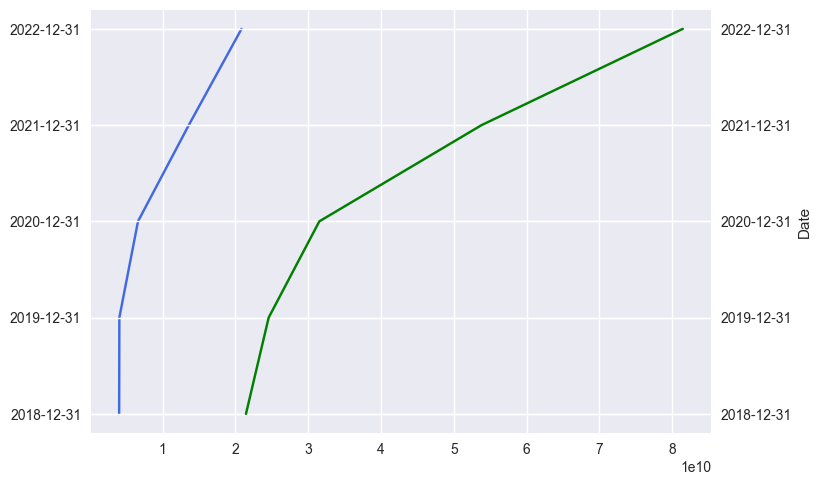

In [112]:
df = df_income_statement.sort_index(ascending = False)
df[['date', 'grossProfit', 'revenue']].head()

fig, ax = plt.subplots()
ax2 = ax.twinx()

plt.style.use('seaborn')
plt.xlabel('Gross Profit and Revenue')
plt.ylabel('Date')
ax.plot(df['grossProfit'], df['date'], color = "royalblue")
ax2.plot(df['revenue'], df['date'], color = 'g')


plt.show()


In [113]:
#Net Profit Margin - This is the Ultimate analysis item -  can a business earn a profit when all deductions are considered
def format_float(npm):
    return f'{npm:,.2f}'
npm = df_income_statement[['netIncome', 'revenue']].applymap(format_float)
print(npm)
net_profit_margin = df_income_statement['netIncome'][0] / df_income_statement['revenue'][0]

print(f'Net Profit Margin {net_profit_margin:.2f}')
if net_profit_margin > 0.10:
    print('Current net profit margin indicates a healthy financial performance')
elif net_profit_margin < 0.10:
    print('raises concerns about profitability from your revenue streams')

           netIncome            revenue
0  12,583,000,000.00  81,462,000,000.00
1   5,519,000,000.00  53,823,000,000.00
2     690,000,000.00  31,536,000,000.00
3    -775,000,000.00  24,578,000,000.00
4    -976,091,000.00  21,461,268,000.00
Net Profit Margin 0.15
Current net profit margin indicates a healthy financial performance


In [114]:
#Interest Coverage Ratio
def format_float(icr):
    return f'{icr:,.2f}'
icr = df_income_statement[['operatingIncome', 'interestExpense']].applymap(format_float)
print(icr)

int_coverage_ratio = df_income_statement['operatingIncome'][0] / df_income_statement['interestExpense'][0]
print(f'{int_coverage_ratio:.2f}')

     operatingIncome interestExpense
0  13,656,000,000.00  191,000,000.00
1   6,687,000,000.00  371,000,000.00
2   1,994,000,000.00  748,000,000.00
3     169,000,000.00  685,000,000.00
4    -388,073,000.00  663,071,000.00
71.50


In [115]:
#Operating Margin - It reveals the amount that a business has earned before financing other costs are considered
def format_float(om):
    return f'{om:,.2f}'
om = df_income_statement[["ebitda", 'revenue']].applymap(format_float)
print(om)

operating_margin = df_income_statement['ebitda'][0] / df_income_statement['revenue'][0]

if operating_margin > 0.10:
    print(f'With an Operating Margin of {operating_margin},{ticker} demonstrates efficient cost management in generating profits from operations.')
else:
    print('The Operating Margin is below 10%, indicating a challenging profitability situation at the operational level.')

print(f'{operating_margin:.2f}')

              ebitda            revenue
0  17,833,000,000.00  81,462,000,000.00
1   9,598,000,000.00  53,823,000,000.00
2   4,224,000,000.00  31,536,000,000.00
3   2,323,000,000.00  24,578,000,000.00
4   1,694,609,000.00  21,461,268,000.00
With an Operating Margin of 0.21891188529621172,TSLA demonstrates efficient cost management in generating profits from operations.
0.22
